In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Lee el archivo CSV
df = pd.read_csv('/content/winequalityN.csv')

# Muestra las primeras filas del dataframe
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Muestra información general sobre el dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [ ]:
# Muestra estadísticas descriptivas
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

# Limpieza de datos


In [ ]:
# Verificar valores faltantes
print(df.isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [ ]:
# 1. Eliminar filas con valores faltantes
df_cleaned = df.dropna()

In [ ]:
# Verificar que no hay duplicados
print(df_cleaned.duplicated().sum())

In [ ]:
# Eliminar filas duplicadas
df_cleaned = df_cleaned.drop_duplicates()

# Verificar que no hay duplicados
print(df_cleaned.duplicated().sum())


0


## conversion de Variables Categoricas

In [ ]:
# Convertir la columna 'type' a variables dummy (one-hot encoding)
df_cleaned = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True)

# Verificar las primeras filas para confirmar la conversión
print(df_cleaned.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  type_white  
0      8.8        6        True  
1      9.5        

# Aplicacion del modelo de regresion Bayesiana

## Preparacion de de los datos para el modelo

In [ ]:
from sklearn.model_selection import train_test_split

# Separar características (X) y la variable objetivo (y)
X = df_cleaned.drop('quality', axis=1)
y = df_cleaned['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Entreamiento del Modelo de Regresión Bayesiana


In [ ]:
!pip install scikit-learn

from sklearn.linear_model import BayesianRidge

# Crear el modelo de regresión bayesiana
model = BayesianRidge()

# Entrenar el modelo
model.fit(X_train, y_train)


BayesianRidge()

## Evaluación del Modelo

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.6276313211816933
R^2 Score: 0.2833906839624788


# Visualizacion de los datos


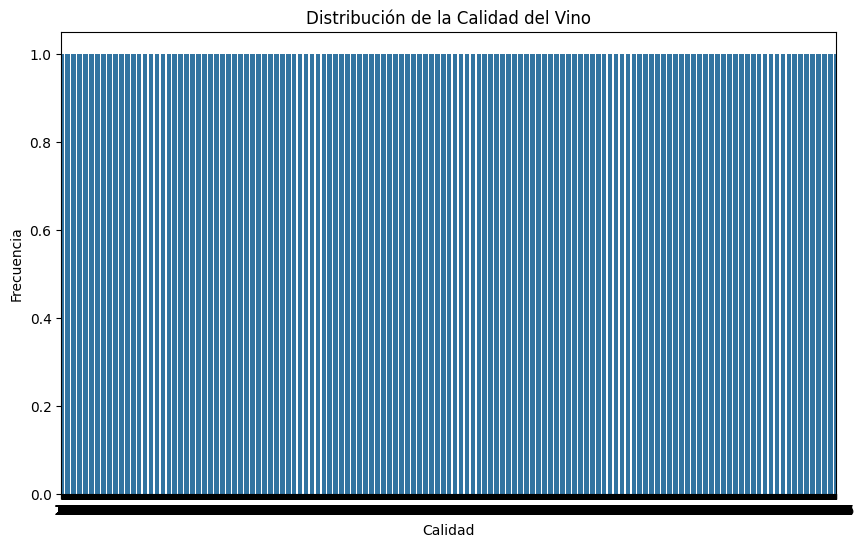

In [ ]:
# Distribución de la variable objetivo 'quality'
plt.figure(figsize=(10, 6))
sns.countplot(df_cleaned['quality'])
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

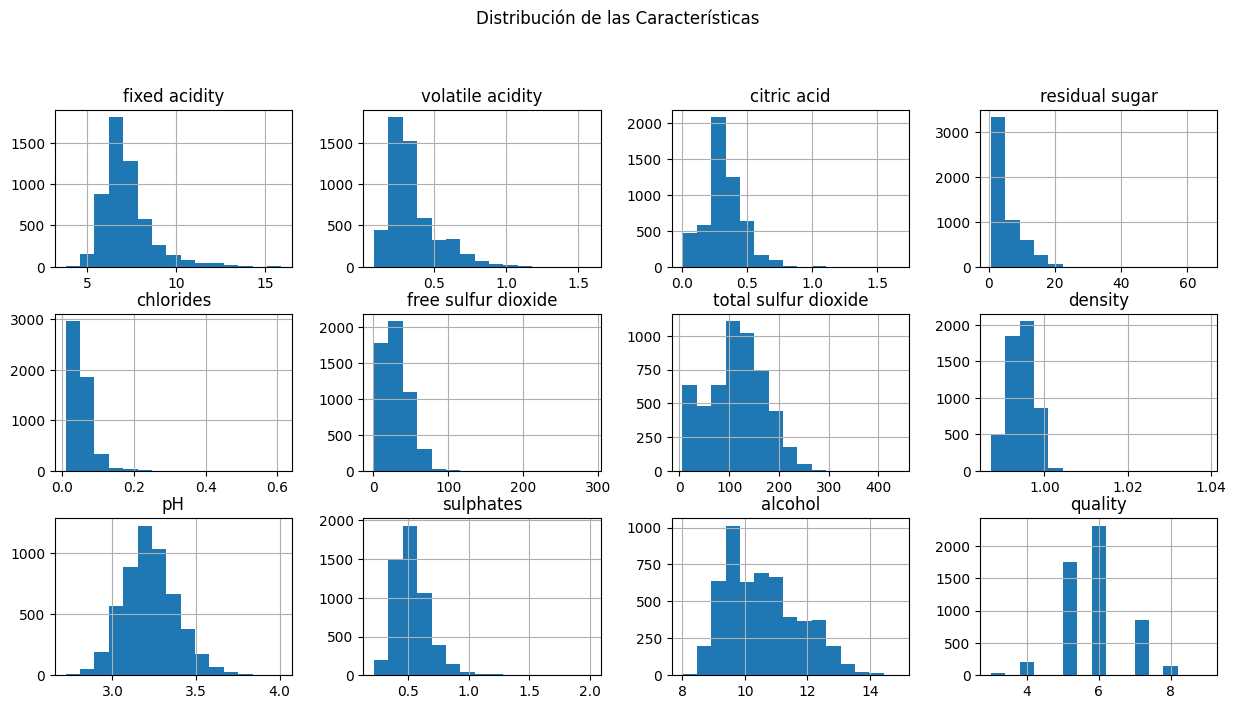

In [ ]:
# Histograma de características numéricas
df_cleaned.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Distribución de las Características')
plt.show()

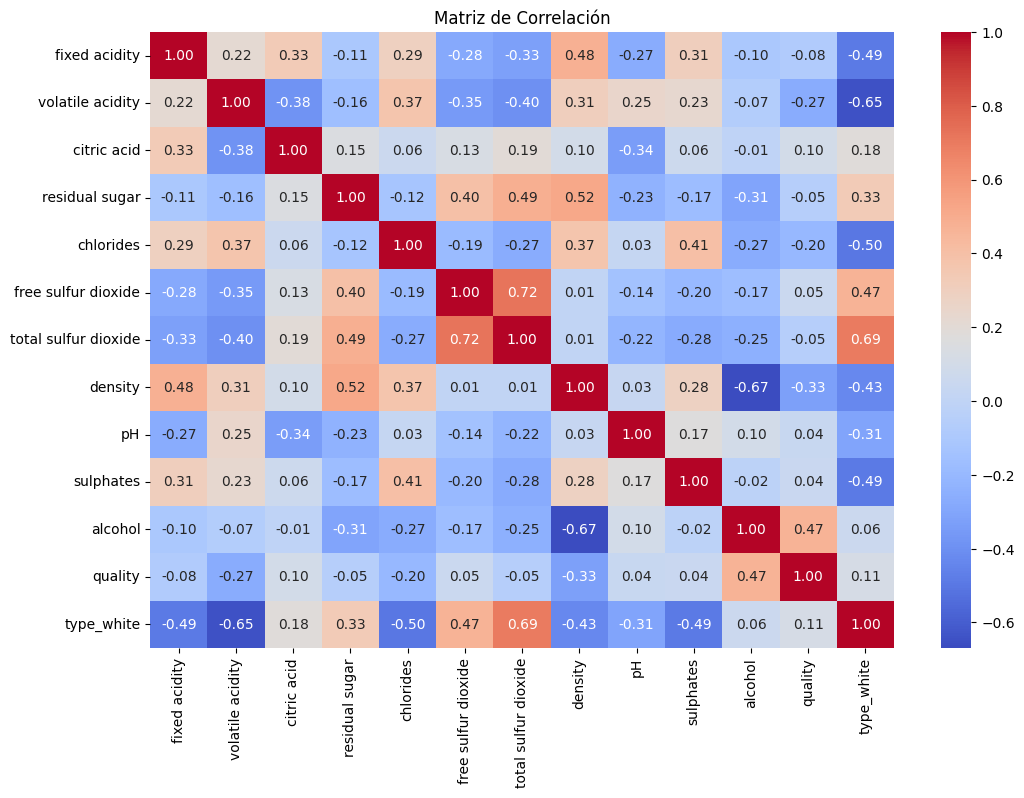

In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

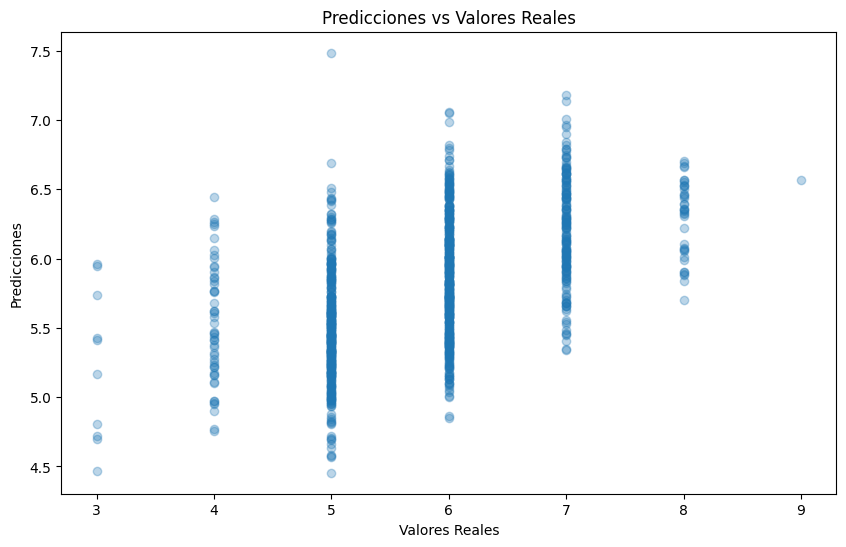

In [ ]:
# Visualización de la predicción vs real
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

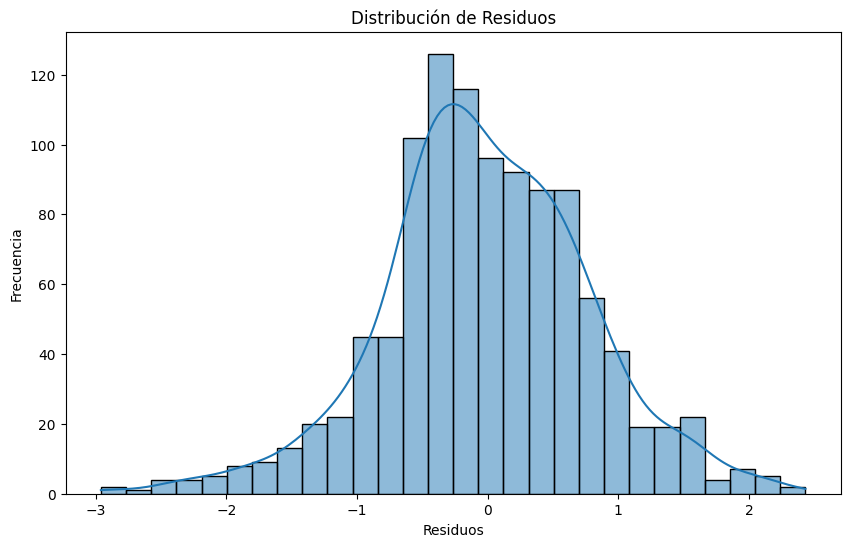

In [ ]:
# Histograma de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()